In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [ ]:
df = pd.read_csv("/content/vehicles.csv", engine="python", on_bad_lines="skip")
print(df.shape)
df1_reduced = df.sample(n=5)
print(df1_reduced)

(426880, 26)
                id                                                url  \
183510  7304731655  https://baltimore.craigslist.org/ctd/d/gwynn-o...   
4897    7309841423  https://tuscaloosa.craigslist.org/ctd/d/tuscal...   
424417  7309785253  https://milwaukee.craigslist.org/ctd/d/eau-cla...   
337192  7310598797  https://pittsburgh.craigslist.org/ctd/d/north-...   
95787   7308871669  https://fortmyers.craigslist.org/lee/ctd/d/for...   

                       region                         region_url  price  \
183510              baltimore   https://baltimore.craigslist.org   4250   
4897               tuscaloosa  https://tuscaloosa.craigslist.org  19990   
424417              milwaukee   https://milwaukee.craigslist.org  11950   
337192             pittsburgh  https://pittsburgh.craigslist.org   4295   
95787   ft myers / SW florida   https://fortmyers.craigslist.org  41590   

          year manufacturer                        model condition  \
183510  2003.0       toyota

In [ ]:
df_reduced = df.sample(n=10100, random_state=42)

# Crear codificador
le = LabelEncoder()

# Ajustar y transformar manufacturer
df_reduced['manufacturer_encoded'] = le.fit_transform(df_reduced['manufacturer'].astype(str))

# Ahora puedes usar esta columna en tu regresión
# Construir matriz X con solo valores numéricos
# Mantener solo las filas donde no haya NaN ni en X ni en y
df_clean = df_reduced[['year', 'manufacturer_encoded', 'price']].dropna()

# Separar X e y
x = df_clean[['year', 'manufacturer_encoded']].values
y = df_clean['price'].values

m = y.size

print(m)

10073


In [ ]:
def  featureNormalize(X):

    X_norm = X.copy().astype(float)
    mu = np.zeros(X.shape[1])
    sigma = np.zeros(X.shape[1])

    mu = np.mean(X, axis = 0)
    sigma = np.std(X, axis = 0)
    X_norm = (X - mu) / sigma

    return X_norm, mu, sigma

In [ ]:
# llama featureNormalize con los datos cargados
X_norm, mu, sigma = featureNormalize(x)

print('Media calculada:', mu)
print('Desviación estandar calculada:', sigma)

Media calculada: [2011.33833019   18.0433833 ]
Desviación estandar calculada: [ 9.19473394 11.07974954]


In [ ]:
# Añade el termino de interseccion a X
# (Columna de unos para X0)
X = np.concatenate([np.ones((m, 1)), X_norm], axis=1)

In [ ]:
def computeCostMulti(X, y, theta):
    # Inicializa algunos valores utiles
    m = y.shape[0] # numero de ejemplos de entrenamiento

    J = 0

    # h = np.dot(X, theta)

    J = (1/(2 * m)) * np.sum(np.square(np.dot(X, theta) - y))

    return J


In [ ]:
def gradientDescentMulti(X, y, theta, alpha, num_iters):

    # Inicializa algunos valores
    m = y.shape[0] # numero de ejemplos de entrenamiento

    # realiza una copia de theta, el cual será acutalizada por el descenso por el gradiente

    theta = theta.copy()

    J_history = []

    for i in range(num_iters):
        theta = theta - (alpha / m) * (np.dot(X, theta) - y).dot(X)
        J_history.append(computeCostMulti(X, y, theta))

    return theta, J_history


theta calculado por el descenso por el gradiente: [17869.91028169  3730.01328824  -342.86839398]


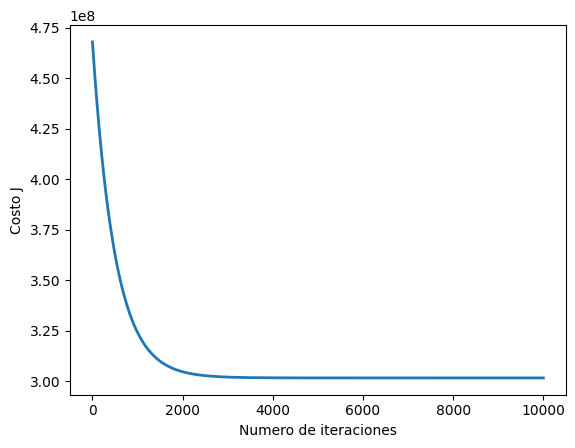

In [ ]:
# Elegir algun valor para alpha (probar varias alternativas)
alpha = 0.001 # alpha = 0.003
num_iters = 10000

# inicializa theta y ejecuta el descenso por el gradiente
theta = np.zeros(3)
theta, J_history = gradientDescentMulti(X, y, theta, alpha, num_iters)

# Grafica la convergencia del costo
plt.plot(np.arange(len(J_history)), J_history, lw=2)
plt.xlabel('Numero de iteraciones')
plt.ylabel('Costo J')

# Muestra los resultados del descenso por el gradiente
print('theta calculado por el descenso por el gradiente: {:s}'.format(str(theta)))

In [ ]:
# Datos nuevos
year = 1980
manufacturer = "toyota"

# 1. Convertir la marca a su código
manufacturer_encoded = le.transform([manufacturer])[0]

# 2. Crear vector de entrada
x_new = np.array([year, manufacturer_encoded])

# 3. Normalizar usando mu y sigma de entrenamiento
x_new_norm = (x_new - mu) / sigma

# 4. Agregar 1 para el término de intersección (bias)
x_new_final = np.concatenate(([1], x_new_norm))

# 5. Calcular predicción
y_pred = np.dot(x_new_final, theta)
print(f"Precio estimado para {year} {manufacturer}: {y_pred}")


Precio estimado para 1980 toyota: 4570.317061281923


In [ ]:
# Datos nuevos
year = 1980
manufacturer = "infiniti"

# 1. Convertir la marca a su código
manufacturer_encoded = le.transform([manufacturer])[0]

# 2. Crear vector de entrada
x_new = np.array([year, manufacturer_encoded])

# 3. Normalizar usando mu y sigma de entrenamiento
x_new_norm = (x_new - mu) / sigma

# 4. Agregar 1 para el término de intersección (bias)
x_new_final = np.concatenate(([1], x_new_norm))

# 5. Calcular predicción
y_pred = np.dot(x_new_final, theta)
print(f"Precio estimado para {year} {manufacturer}: {y_pred}")

Precio estimado para 1980 infiniti: 5220.1725697838


Ecuacion de la Normal

In [ ]:
def normalEqn(X, y):

    theta = np.zeros(X.shape[1])

    theta = np.dot(np.dot(np.linalg.inv(np.dot(X.T,X)),X.T),y)

    return theta

In [ ]:
# Calcula los parametros con la ecuación de la normal
theta = normalEqn(X, y);

# Muestra los resultados optenidos a partir de la aplicación de la ecuación de la normal
print('Theta calculado a partir de la ecuación de la normal: {:s}'.format(str(theta)));

# Estimar el precio para una casa de superficie de 1650 sq-ft y tres dormitorios

# Datos nuevos
year = 1980
manufacturer = "chevrolet"

# 1. Convertir la marca a su código
manufacturer_encoded = le.transform([manufacturer])[0]

# 2. Crear vector de entrada
x_new = np.array([year, manufacturer_encoded])

# 3. Normalizar usando mu y sigma de entrenamiento
x_new_norm = (x_new - mu) / sigma

# 4. Agregar 1 para el término de intersección (bias)
x_new_final = np.concatenate(([1], x_new_norm))

# 5. Calcular predicción
y_pred = np.dot(x_new_final, theta)
print(f"Precio estimado para {year} {manufacturer}: {y_pred}")

Theta calculado a partir de la ecuación de la normal: [17870.7175618   3730.18317471  -342.89499226]
Precio estimado para 1980 chevrolet: 5498.936841974791


Regracion Polinomica

In [ ]:
df_reduced = df.sample(n=10100, random_state=42)

# Crear codificadores separados
le_manufacturer = LabelEncoder()
le_paint = LabelEncoder()

# Codificar manufacturer
df_reduced['manufacturer_encoded'] = le_manufacturer.fit_transform(df_reduced['manufacturer'].astype(str))

# Codificar paint_color
df_reduced['paint_color_encoded'] = le_paint.fit_transform(df_reduced['paint_color'].astype(str))

# Mantener solo filas sin NaN
df_clean = df_reduced[['year', 'manufacturer_encoded', 'paint_color_encoded', 'price']].dropna()

# Separar X e y
x = df_clean[['year', 'manufacturer_encoded', 'paint_color_encoded']].values
y = df_clean['price'].values

m = y.size
print(m)

In [ ]:
def plotData(x, y):
    #Grafica los puntos x e y en una figura nueva.

    fig = plt.figure()  # abre una nueva figura

    plt.plot(x, y, 'ro', ms=10, mec='k')
    plt.ylabel('Precio')
    plt.xlabel('descripciones')

In [ ]:
plotData(x, y)

In [ ]:
X = np.concatenate([x, x * x], axis=1)

In [ ]:
def  featureNormalize(X):
    X_norm = X.copy().astype(float)
    mu = np.zeros(X.shape[1])
    sigma = np.zeros(X.shape[1])

    mu = np.mean(X, axis = 0)
    sigma = np.std(X, axis = 0)
    X_norm = (X - mu) / sigma

    return X_norm, mu, sigma

In [ ]:
# llama featureNormalize con los datos cargados
X_norm, mu, sigma = featureNormalize(X)

#print(X)
print('Media calculada:', mu)
print('Desviación estandar calculada:', sigma)
#print(X_norm)

In [ ]:
plotData(X_norm[:,1], y)

In [ ]:
# Añade el termino de interseccion a X
# (Columna de unos para X0)
#X_norm = np.concatenate([X_norm, X_norm * X_norm], axis=1)
X = np.concatenate([np.ones((m, 1)), X_norm], axis=1)

In [ ]:
def computeCostMulti(X, y, theta):
    # Inicializa algunos valores utiles
    m = y.shape[0] # numero de ejemplos de entrenamiento

    J = 0

    h = np.dot(X, theta)

    J = (1/(2 * m)) * np.sum(np.square(np.dot(X, theta) - y))

    return J

In [ ]:
def gradientDescentMulti(X, y, theta, alpha, num_iters):

    # Inicializa algunos valores
    m = y.shape[0] # numero de ejemplos de entrenamiento

    # realiza una copia de theta, el cual será acutalizada por el descenso por el gradiente
    theta = theta.copy()

    J_history = []

    for i in range(num_iters):
        theta = theta - (alpha / m) * (np.dot(X, theta) - y).dot(X)
        J_history.append(computeCostMulti(X, y, theta))

    return theta, J_history

In [ ]:
# Elegir algun valor para alpha (probar varias alternativas)
alpha = 0.001
num_iters = 2000

# inicializa theta y ejecuta el descenso por el gradiente
theta = np.zeros(X.shape[1])

theta, J_history = gradientDescentMulti(X, y, theta, alpha, num_iters)

# Grafica la convergencia del costo
plt.plot(np.arange(len(J_history)), J_history, lw=2)
plt.xlabel('Numero de iteraciones')
plt.ylabel('Costo J')

# Muestra los resultados del descenso por el gradiente
print('theta calculado por el descenso por el gradiente: {:s}'.format(str(theta)))

In [ ]:
# Datos nuevos
year = 2005
manufacturer = "chevrolet"
paint_color = "orange"

# Codificar variables categóricas
manufacturer_encoded = le_manufacturer.transform([manufacturer])[0]
paint_color_encoded = le_paint.transform([paint_color])[0]

# Vector de entrada (solo features)
x_new = np.array([year, manufacturer_encoded, paint_color_encoded])


# Crear los términos polinómicos (cuadrados de cada feature)
x_new_poly = np.concatenate([x_new, x_new**2])

# Normalizar usando mu y sigma de entrenamiento
x_new_norm = (x_new_poly - mu) / sigma

# Agregar columna de unos para el intercepto
x_new_final = np.concatenate(([1], x_new_norm))

# Calcular predicción
y_pred = np.dot(x_new_final, theta)

print(f"Precio estimado: {y_pred}")

In [ ]:
# Datos nuevos
year = 2010
manufacturer = "toyota"
paint_color = "black"

# Codificar variables categóricas
manufacturer_encoded = le_manufacturer.transform([manufacturer])[0]
paint_color_encoded = le_paint.transform([paint_color])[0]

# Vector de entrada (solo features)
x_new = np.array([year, manufacturer_encoded, paint_color_encoded])


# Crear los términos polinómicos (cuadrados de cada feature)
x_new_poly = np.concatenate([x_new, x_new**2])

# Normalizar usando mu y sigma de entrenamiento
x_new_norm = (x_new_poly - mu) / sigma

# Agregar columna de unos para el intercepto
x_new_final = np.concatenate(([1], x_new_norm))

# Calcular predicción
y_pred = np.dot(x_new_final, theta)

print(f"Precio estimado: {y_pred}")